# Tips for kaggle competition

In [27]:
import numpy as np
import pandas as pd

## Preprocessing-Numerical Features

### Outliers: Clip value range

<AxesSubplot:>

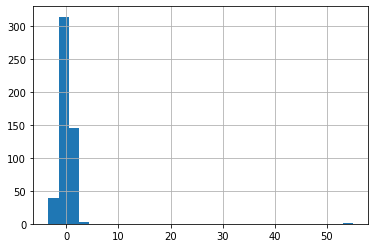

In [25]:
X = pd.Series(np.append(np.random.randn(500),55.0))

X.hist(bins = 30)

<AxesSubplot:>

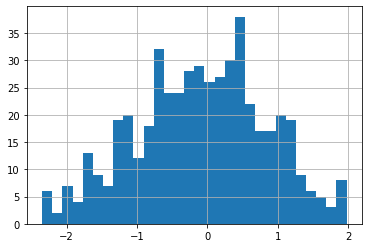

In [26]:
UPPERBOUND, LOWERBOUND = np.percentile(X, [1,99])
y = np.clip(X, UPPERBOUND, LOWERBOUND)
y.hist(bins = 30)

### Outliers: Rank

* It sets spaces between proper assorted values to be equal.
* If there is outliers, this open would be better than MinMaxScaler, because rank transormation will move the outliers closer to other objects.
* Liner models, KNN, and neural networks can benefit from this kind of transformation.

In [31]:
from scipy.stats import rankdata
rankdata([0, 2, 3, 2])

array([1. , 2.5, 4. , 2.5])

<AxesSubplot:>

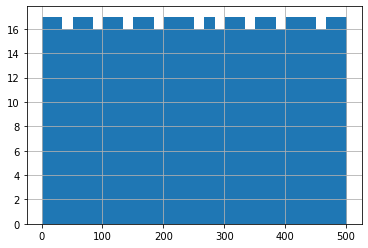

In [37]:
pd.Series(rankdata(X)).hist(bins = 30)

### Log transformation

* for non-tree-based models, especially NN.
* drive too big values closer to the features' average value.
* the values near zero become a bit more distinguishiable.

<AxesSubplot:>

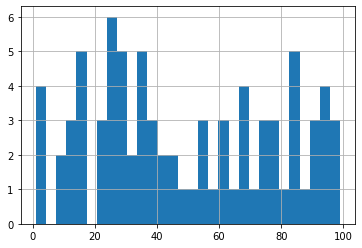

In [42]:
x = np.random.randint(low=1, high=100, size=80)
pd.Series(x).hist(bins = 30)

<AxesSubplot:>

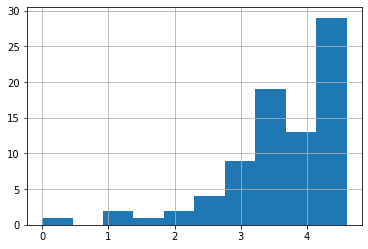

In [51]:
pd.Series(np.log(x)).hist()

<AxesSubplot:>

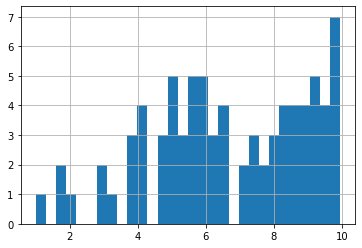

In [52]:
pd.Series(np.sqrt(x)).hist(bins = 30)

### Feature Generation

**Eamples:**
* fractional part of a price
* horizontal + vertical --> direct distance
* other feature intereations.  

## Preprocessing-Categorical Features

* ordianl features: dependence is not linear
    * Label encoding (works fine with tree models)
        * pd.factorize
        * sklearn.preprocessing.LabelEncoder
        * frequency encoding
            * works well with linear models
    * for non-tree models
        * pd.get_dummies
        * OneHotEncoder
        * sparse matrices
    

### Frequency encoding

In [62]:
titanic = pd.read_csv("titanic/train.csv").copy()

In [65]:
encoding = titanic.groupby("Embarked").size()
encoding = round(encoding/len(titanic),1)
titanic['enc'] = titanic.Embarked.map(encoding)

* To Deal with ties:
    * from scipy.stats import rankdata

### Feature Generation


* Simply concatenating clumns

In [74]:
titanic['sex_class'] = titanic['Sex'] + titanic['Pclass'].astype(str)
titanic[['Sex', 'Pclass', 'sex_class']]

,Sex,Pclass,sex_class
0,male,3,male3
1,female,1,female1
2,female,3,female3
3,female,1,female1
4,male,3,male3
...,...,...,...
886,male,2,male2
887,female,1,female1
888,female,3,female3
889,male,1,male1


## Preprocessing-Datetime and coordinates

### Datetime
1. **Periodicity**
    * Day number in week, month, season, year, second, minute, hour.
1. **Time since**
    1. Row-independent moment
    1. Row-dependent moment.
        * Number of days left until next holidays/time passed after holiday.
1. **Difference between dates**

### Coordinates
1. distance to impoortant points on the map.
    1. centers of clusters
1. caculate aggregated statistics for objects surrounding area.
    1. area popularity.

## Missing values

1. Hidden NaNs: histogram

### Fillna approaches

1. -999， -1， etc.
1. mean, median.
    * not for tree 
1. Reconstruct values, row dependencies features.
1. Binary feature "isnull" can be neneficial.
1. In general, avoid filling nans before feature generation.
1. Xgboost can handle NaN

## Text preprocessing